In [59]:


import pandas as pd

movie_df = pd.read_csv('movies_data.csv')
movie_df.head(5)

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591K,NaN,"September 28, 2013 (United States)",NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6.8K,34.0,"February 7, 2025 (United States)","$17,235,040","$18,000,000 (estimated)",United States,https://www.imdb.com/title/tt30788842/?ref_=sr...
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107K,49.0,"February 10, 1995 (United States)","$18,636,537","$32,000,000 (estimated)","United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19K,NaN,"February 7, 2021 (United States)",NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15K,NaN,"October 13, 2023 (United States)",NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...


In [60]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7994 entries, 0 to 7993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          7994 non-null   object 
 1   genres        7994 non-null   object 
 2   type          7994 non-null   object 
 3   rating        7750 non-null   float64
 4   no_of_votes   7750 non-null   object 
 5   meta_score    3646 non-null   float64
 6   release_date  7936 non-null   object 
 7   gross         3533 non-null   object 
 8   budget        3237 non-null   object 
 9   countries     7958 non-null   object 
 10  url           7994 non-null   object 
dtypes: float64(2), object(9)
memory usage: 687.1+ KB


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


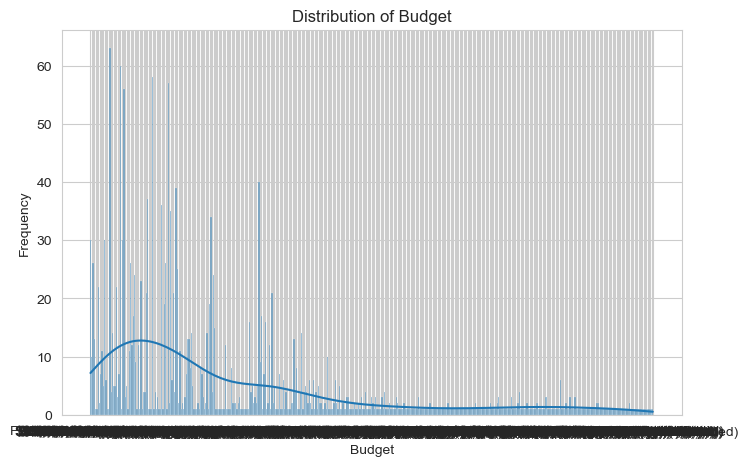

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(movie_df["budget"].dropna(), bins=30, kde=True)
plt.xlabel("Budget")
plt.ylabel("Frequency")
plt.title("Distribution of Budget")
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


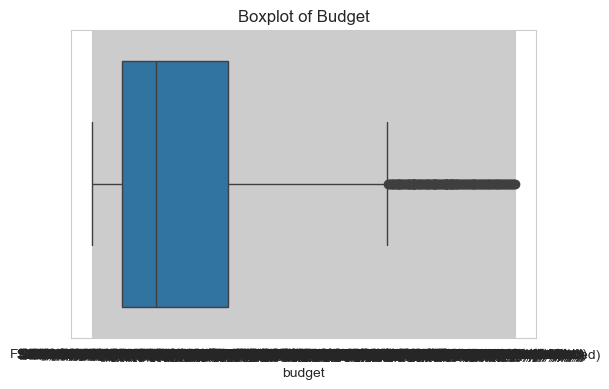

In [68]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=movie_df["budget"])
plt.title("Boxplot of Budget")
plt.show()


Nhiều outliers + Phân phối lệch trái => fillna của budget bằng median

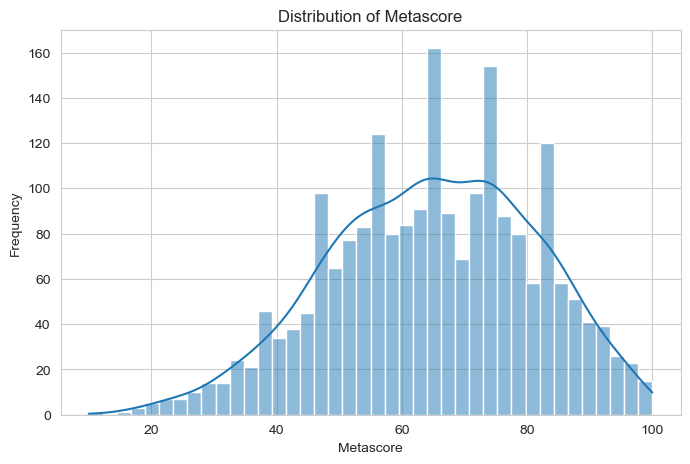

In [65]:
plt.figure(figsize=(8, 5))
sns.histplot(movie_df["meta_score"].dropna(), bins=40, kde=True)
plt.xlabel("Metascore")
plt.ylabel("Frequency")
plt.title("Distribution of Metascore")
plt.show()

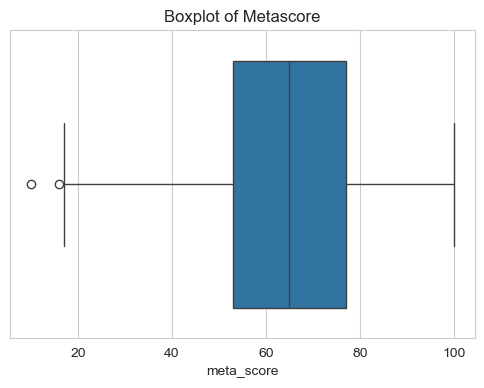

In [69]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=movie_df["meta_score"])
plt.title("Boxplot of Metascore")
plt.show()

In [61]:
movie_df = movie_df.drop_duplicates(subset=["name"], keep="first")
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4996 entries, 0 to 7993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4996 non-null   object 
 1   genres        4996 non-null   object 
 2   type          4996 non-null   object 
 3   rating        4863 non-null   float64
 4   no_of_votes   4863 non-null   object 
 5   meta_score    2143 non-null   float64
 6   release_date  4946 non-null   object 
 7   gross         2084 non-null   object 
 8   budget        1891 non-null   object 
 9   countries     4969 non-null   object 
 10  url           4996 non-null   object 
dtypes: float64(2), object(9)
memory usage: 468.4+ KB


In [62]:
movie_processed_df = pd.read_csv('movies_data_processed.csv')
movie_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4839 non-null   object 
 1   genres        4839 non-null   object 
 2   type          4839 non-null   object 
 3   rating        4839 non-null   float64
 4   no_of_votes   4839 non-null   int64  
 5   meta_score    4839 non-null   float64
 6   release_date  4808 non-null   float64
 7   gross         2084 non-null   float64
 8   budget        4839 non-null   float64
 9   countries     4839 non-null   object 
 10  url           4839 non-null   object 
 11  ROI           1612 non-null   float64
 12  result        4839 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 491.6+ KB


In [63]:
movie_processed_df.describe().applymap(lambda x: f"{x:,.2f}")

/var/folders/4m/jv9v9h3x5ldcqjljb4m2b8j80000gn/T/ipykernel_85021/102955810.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  movie_processed_df.describe().applymap(lambda x: f"{x:,.2f}")


,rating,no_of_votes,meta_score,release_date,gross,budget,ROI
count,"4,839.00","4,839.00","4,839.00","4,808.00","2,084.00","4,839.00","1,612.00"
mean,7.03,"114,235.70",64.75,"2,003.73","144,453,202.24","32,514,160.79",4.55
std,1.13,"246,886.11",10.93,22.16,"264,015,435.07","35,402,785.88",14.35
min,1.50,6.00,10.00,"1,915.00",19.00,"10,000.00",-1.00
25%,6.50,"2,200.00",64.73,"1,996.00","6,456,224.50","25,000,000.00",0.11
50%,7.20,"21,000.00",64.73,"2,012.00","44,139,483.00","25,000,000.00",1.69
75%,7.80,"110,500.00",64.73,"2,020.00","161,055,677.50","25,000,000.00",4.28
max,9.60,"3,000,000.00",100.00,"2,025.00","2,923,710,708.00","414,900,000.00",316.63


In [79]:
movie_processed_df[["type", "countries"]].describe()

,type,countries
count,4839,4839
unique,2,603
top,Movie,United States
freq,2701,2783


In [78]:
from collections import Counter


genre_counts = Counter(genre.strip() for row in movie_processed_df["genres"].dropna() for genre in row.split(","))


genre_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values(by="Count", ascending=False)

print(genre_df)
movie_processed_df["num_genres"] = movie_processed_df["genres"].dropna().apply(lambda x: len(x.split(",")))
movie_processed_df["num_genres"].describe()

print("Top 5 thể loại phổ biến nhất:")
genre_df["Genre"].describe()


                 Genre  Count
9                Drama   2329
11              Comedy   1445
7            Adventure    935
13            Thriller    825
6               Action    819
..                 ...    ...
155  Holiday Animation      2
160              Wuxia      2
206             Giallo      1
207              Josei      1
208         Telenovela      1

[211 rows x 2 columns]
Top 5 thể loại phổ biến nhất:


count       211
unique      211
top       Drama
freq          1
Name: Genre, dtype: object